<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Introduction to multiclass classification
© ExploreAI Academy

In this train, we'll delve into the fundamentals of multiclass classification, address class imbalance, and apply logistic regression to the MBTI dataset.

## Learning objectives

By the end of this train, you should be able to:
- Understand and address class imbalance in the context of multiclass classification.
- Apply logistic regression techniques for multiclass classification problems.
- Gain practical experience with logistic regression on the MBTI dataset, navigating through its unique challenges.

## Dealing with class imbalance

In this train, we will be exploring a phenomenon known as **class imbalance** and learning how to deal with it. Class imbalance occurs when the number of observations across different class labels is unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. However, in the wild, classification datasets often come with unevenly distributed observations with one class or set of classes having way more observations than others.

<img src="https://github.com/Explore-AI/Pictures/blob/master/class-imbalance.png?raw=true" width=80% alt="class imbalance img">

## Resampling

As it turns out, some clever scientists have come up with various ways to address this so-called class imbalance problem. Here we will discuss two variants of the most common method available: **resampling**. Put simply, resampling methods involve modifying the number of observations in each class as follows:

- **Downsampling** - taking a random subset of the majority class small enough to match the number of observations in the minority class.

- **Upsampling** - taking repeated random samples from the minority class until we have as many observations as the  majority class. This grows the size of the minority class by effectively duplicating observations at random.


<img src="https://github.com/Explore-AI/Pictures/blob/master/upsample-downsample.png?raw=true" width=80% alt="class imbalance img">

Let's use an example to demonstrate how these work.

### Example 1: Resampling the email spam classification dataset

One famous dataset for email spam detection is the [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/spambase), which contains a set of features indicating whether or not a particular email is spam. We chose this dataset because of its inherent class imbalance. As you can imagine, the average person receives way more non-spam email than spam email.

In [1]:
import ssl

# Set the path to the CA certificates bundle
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Load a modified version of the Spambase dataset
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/Data/classification_sprint/unbalanced_email_spam_data.csv?raw=true')

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.0,1.63,0.0,0.00,0.0,0.00,0.0,0.0,0.00,...,0.000,0.000,0.000,2.695,0.000,0.000,2.315,12,44,1
1,0.00,0.0,0.00,0.0,0.26,0.0,0.26,0.0,0.0,0.00,...,0.462,0.084,0.084,0.378,0.000,1.051,13.820,104,1078,1
2,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,...,0.000,0.000,0.000,0.000,3.260,0.000,2.444,10,44,1
3,0.25,0.0,0.25,0.0,0.50,0.0,0.25,0.0,0.0,0.00,...,0.000,0.041,0.000,0.082,0.041,0.041,1.890,18,225,1
4,0.25,0.5,0.50,0.0,0.00,0.0,0.00,0.0,0.0,0.25,...,0.000,0.181,0.000,0.407,0.997,0.000,3.417,49,270,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3201 non-null   float64
 1   word_freq_address           3201 non-null   float64
 2   word_freq_all               3201 non-null   float64
 3   word_freq_3d                3201 non-null   float64
 4   word_freq_our               3201 non-null   float64
 5   word_freq_over              3201 non-null   float64
 6   word_freq_remove            3201 non-null   float64
 7   word_freq_internet          3201 non-null   float64
 8   word_freq_order             3201 non-null   float64
 9   word_freq_mail              3201 non-null   float64
 10  word_freq_receive           3201 non-null   float64
 11  word_freq_will              3201 non-null   float64
 12  word_freq_people            3201 non-null   float64
 13  word_freq_report            3201 

Let's do a quick analysis of the distribution of observations across our labels.

In [8]:
# Separate minority and majority classes
not_spam = df[df['spam']==0]
spam = df[df['spam']==1]

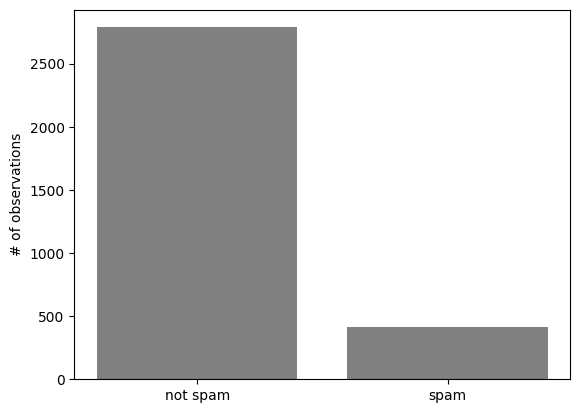

In [9]:
# Get all possible labels
labels = df['spam'].unique()
heights = [len(spam),len(not_spam)]
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['spam','not spam'])
plt.ylabel("# of observations")
plt.show()

In [20]:
# Percentage of non-spam emails in the dataset 
len(not_spam)/(len(df))

0.8709778194314277

As you can see, our two classes are imbalanced. To put this in perspective as to why this is such an issue, say we had a model that always predicts that a given email is not spam (clearly a really bad model!). Such a model would achieve an accuracy of 87%! This is why (as explained in previous trains), class imbalance can be a serious problem if left unchecked. 

Let's use resampling techniques to fix this. Notice that we are keeping our features and labels together for the time being so that they get sampled together (otherwise we risk mixing labels and observations):

In [11]:
# As usual, we start by importing our modules
from sklearn.utils import resample

#### Example 1.1: Approach 1 - Downsampling the majority class

Since the `not_spam` class has so many observations, we can reduce it's size by taking a small random subset of observations to match the size of the `spam` class. Because this approach reduces the overall size of the dataset, it makes sense to use it only in cases where we have a big collection of data.

In [12]:
# Downsample majority
not_spam_downsampled = resample(not_spam,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(spam), # match number in minority class
                          random_state=27) # reproducible results

# Combine downsampled majority class with minority class
downsampled = pd.concat([not_spam_downsampled, spam])

# Check new class counts
downsampled['spam'].value_counts()

spam
0    413
1    413
Name: count, dtype: int64

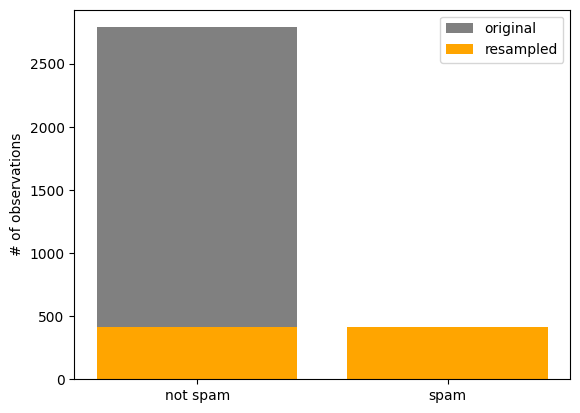

In [14]:
downsampled_heights = [len(downsampled[downsampled['spam']==0]),len(downsampled[downsampled['spam']==1])]

# Get all possible labels
labels = df['spam'].unique()
plt.bar(labels,heights,color='grey')
plt.bar(labels,downsampled_heights,color='orange')
plt.xticks(labels,['spam','not spam'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

#### Example 1.2: Approach 2 - Upsampling the minority class

Here, we simply make random copies of observations in the minority class until we match the size of the majority class. Using this approach means we end up with more data. 

In [15]:
# Upsample minority
spam_upsampled = resample(spam,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(not_spam), # match number in minority class
                          random_state=27) # reproducible results

# Combine upsampled minority class with majority class
upsampled = pd.concat([spam_upsampled, not_spam])

# Check new class counts
upsampled['spam'].value_counts()

spam
1    2788
0    2788
Name: count, dtype: int64

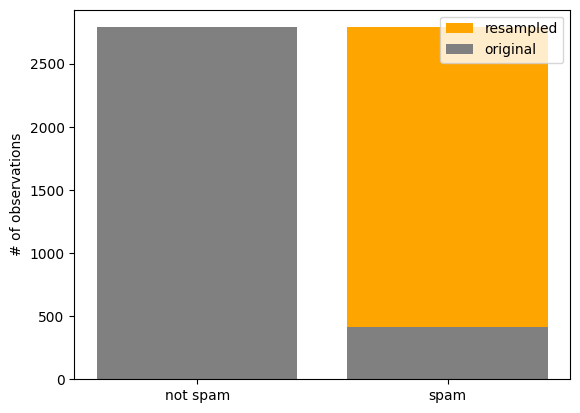

In [21]:
upsampled_heights = [len(upsampled[upsampled['spam']==0]),len(upsampled[upsampled['spam']==1])]

# Get all possible labels
labels = df['spam'].unique()
plt.bar(labels,upsampled_heights,color='orange')
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['spam','not spam'])
plt.ylabel("# of observations")
plt.legend(['resampled','original'])
plt.show()

#### Example 1.3: Approach 3 - Best of both (upsample minority class + downsample majority class)

As you may have guessed, this approach involves performing both kinds or resampling techniques. 

#### Exercise: See if you can implement this technique by following these steps:

1. Establish a **class size** (i.e. the number of observations we want in each class). For this approach to work, the **class size** has to be a value between the size of the majority class and the size of the minority class. A good heuristic to use is to **set the class size to be half the size of the majority class**.

2. Downsample the majority class to be as small as the **class size**.

3. Upsample the minority class to be as big as the **class size**.

4. *Et voila!*, you should now have evenly distributed observations that you can throw at any classification model you like.

spam
0    1394
1    1394
Name: count, dtype: int64


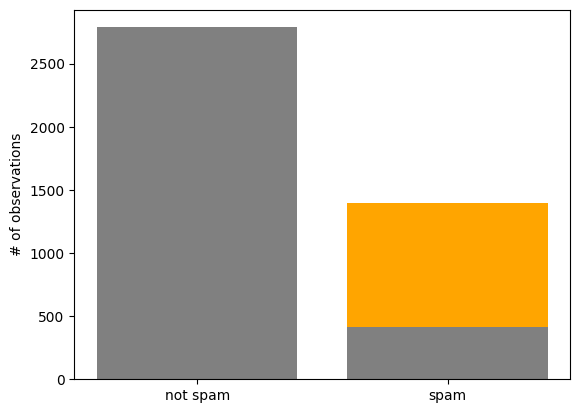

In [39]:
# your awesome code here :D

# Import libraries (assuming pandas is already imported)
from sklearn.utils import resample

# Establish class size (assuming majority class is at index 0 in class_counts)
class_counts = df['spam'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
class_size = int(class_counts.iloc[0] / 2)  # Assuming majority class is at index 0

# Check class size validity (optional)
if class_size < class_counts.iloc[1] or class_size > class_counts.iloc[0]:
    print("Invalid class size. Choose a value between minority and majority class size.")
    exit()

# Downsample majority class
majority_data = df[df['spam'] == majority_class]
downsampled_majority = majority_data.sample(class_size, random_state=42)

# Upsample minority class
minority_data = df[df['spam'] == minority_class]
upsampled_minority = minority_data.sample(class_size, replace=True, random_state=42)

# Combine downsampled and upsampled data
balanced_data = pd.concat([downsampled_majority, upsampled_minority], ignore_index=True)

# Check new class counts
print(balanced_data['spam'].value_counts())
up_down_sampled_heights = [len(balanced_data[balanced_data['spam']==0]),len(balanced_data[balanced_data['spam']==1])]

# Get all possible labels
labels = df['spam'].unique()
plt.bar(labels,up_down_sampled_heights,color='orange')
plt.bar(labels,heights,color='grey')
plt.xticks(labels,['spam','not spam'])
plt.ylabel("# of observations")
plt.show()

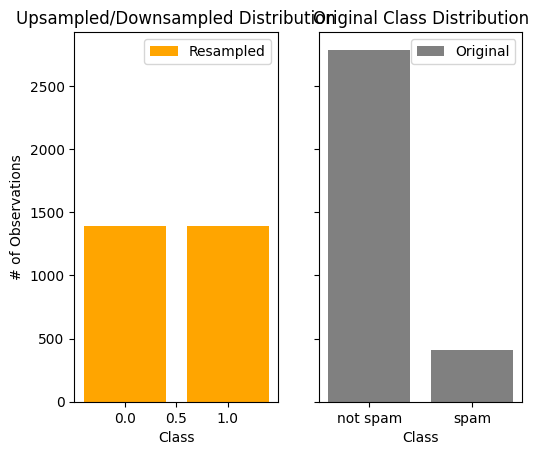

In [35]:
# Get all possible labels (assuming 'spam' is the target class)
labels = df['spam'].unique()

# Create a figure with 1 row and 2 columns, sharing Y-axis
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

# Plot on the first subplot (upsampled/downsampled)
ax0.bar(labels, up_down_sampled_heights, color='orange', label='Resampled')
ax0.set_xlabel('Class')
ax0.set_ylabel('# of Observations')
ax0.set_title('Upsampled/Downsampled Distribution')
ax0.legend()  # Add legend within the first subplot

# Plot on the second subplot (original)
ax1.bar(labels, heights, color='grey', label='Original')
ax1.set_xlabel('Class')
ax1.set_title('Original Class Distribution')
ax1.legend()  # Add legend within the second subplot

# Adjust layout to prevent label overlap (optional)
plt.subplots_adjust(left=0.2)

# Set X-axis tick labels (applies to both subplots)
plt.xticks(labels, ['spam', 'not spam'])

# Show the plot
plt.show()

### Example 2: Logistic regression on the MBTI dataset

Another famous dataset is the MBTI dataset, in this train we will fit a logistic regression model to the MBTI dataset and attempt to predict personality types given some text.

As always, we start off by loading some dependencies and preprocessing our data. 

In [41]:
# Imports
import numpy as np
import pandas as pd

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Customise our plotting settings
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

import nltk

#### Example 2.1: Getting and preprocessing the data

In [42]:
# Download the MBTI data
mbti = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/Data/classification_sprint/mbti.csv?raw=true')

In [43]:
mbti.head()

,Unnamed: 0,type,post
0,0,INFJ,urlweb
1,1,INFJ,urlweb
2,2,INFJ,enfp and intj moments urlweb sportscenter no...
3,3,INFJ,what has been the most lifechanging experience...
4,4,INFJ,urlweb urlweb on repeat for most of today


In [44]:
sum_mbti = mbti[['type', 'post']].groupby('type').count()

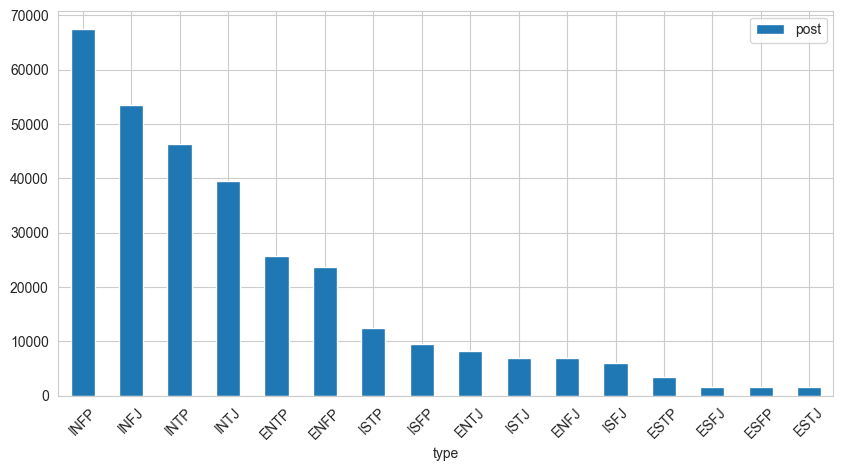

In [50]:
# Plot posts by personality types
sum_mbti.sort_values('post', ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

At this point, we can see the imbalance creeping in. The introverted types have way more posts than the extroverted types. But before we fix this using some resampling Kung Fu, let's first vectorize our data. 

*Can you come up with reasons why it makes sense to vectorize before resampling?*

#### Example 2.3: Transforming text into numbers

**1. Features**

Before we can feed our data into our machine learning model, we need to first transform the text into numbers. One common method well suited for this task is Count Vectorization. We can apply this method using Sklearn as follows:

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316548 entries, 0 to 316547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  316548 non-null  int64 
 1   type        316548 non-null  object
 2   post        314593 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.2+ MB


In [54]:
# Let's use the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(mbti['post'].values.astype(str))

In [55]:
X_count.shape

(316548, 121556)

There should already be alarm bells sounding here.  We have more than 315,000 rows, which is enough data for this algorithm to run effectively.  We, however,  have almost 122,000 features - a lot of which correspond to words which only appear once (see if you can verify this on your own).  

For this train, we will be using the top 20 words that appear most often, to make our model easier to train. Don't worry too much about this step, we will cover hyperparameter tuning in future trains.

In [58]:
vect_20 = CountVectorizer(lowercase=True, stop_words='english', max_features=20,analyzer='word', ngram_range=(1, 3))
X_count = vect_20.fit_transform(mbti['post'].values.astype(str))

In [59]:
# Uncomment and run this line to see feature names
vect_20.get_feature_names_out()

array(['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'lot',
       'love', 'people', 'really', 'say', 'things', 'think', 'time',
       'type', 'urlweb', 'want', 'way'], dtype=object)

In [62]:
# Get shape of our new predictive variables
X_count.shape

(316548, 20)

In [63]:
X = X_count.toarray()

**2. Response Variable**

Since our response consists of text categories, we need to somehow also convert to numerical values. Luckily for us, Sklearn has just the thing. Introducing the [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Unlike  `pd.get_dummies` method which creates a new column for every category it encounters, the LabelEncoder replaces each category with a number, the first category encountered will be replaced with a 0, the next one with a 1, the next with a 2, and so on.

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(mbti['type'])

In [69]:
y

array([8, 8, 8, ..., 9, 9, 9])

And just like that, we have transformed our labels into a range of values between 0 and 15

In [72]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)

#### Example 2.4: Training the logistic regression model on standard MBTI data

Finally, our data are cleaned and processed, and we are now in a position to train a logistic regression model. 

**Setting up the train_test_split**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

**Training the model**

Sklearn's logistic regression model has the capacity to accommodate multiple classes, even though logistic regression is a binary classification model. One way it does this is through a [One vs Rest](https://chrisalbon.com/machine_learning/logistic_regression/one-vs-rest_logistic_regression/) scheme (i.e. one class vs the rest of the classes). This means that we split the multi-class classification problem into multiple binary classification problems as follows:

- Class 1 and not Class 1
- Class 2 and not Class 2
- Class 3 and not Class 3
-   ...          ...
- Class n and not Class n

And then train a logistic regression model for each of these. At test time, we run the same test data through all the models and take the prediction of the logistic regression model with the highest probability. 

In [75]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')

**Note:** The cell below may take a while to train depending on the number of features you have (up to 5 minutes for slower computers)

In [76]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

#### Example 2.5: Checking outcomes on the testing set

We now investigate the performance of our newly trained models on the Test set of our data.

In [82]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [83]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, target_names=type_labels))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00      1384
        ENFP       0.00      0.00      0.00      4791
        ENTJ       0.00      0.00      0.00      1643
        ENTP       0.00      0.00      0.00      5238
        ESFJ       0.00      0.00      0.00       337
        ESFP       0.00      0.00      0.00       319
        ESTJ       0.00      0.00      0.00       275
        ESTP       0.00      0.00      0.00       689
        INFJ       0.22      0.01      0.01     10777
        INFP       0.21      1.00      0.35     13475
        INTJ       0.00      0.00      0.00      8008
        INTP       0.00      0.00      0.00      9316
        ISFJ       0.00      0.00      0.00      1235
        ISFP       0.00      0.00      0.00      1880
        ISTJ       0.00      0.00      0.00      1462
        ISTP       0.00      0.00      0.00      2481

    accuracy                           0.21     63310
   macro avg       0.03   

As you can see, this gives us an overall accuracy of 21% (this is the percentage of times we predict the correct class in the data). We also get a weighed F1 score of 0.07. Now besides these numbers, there are a lot of other issues here. This biggest one being that our model never predicts some of the classes. 

That said, the model is not completely useless since it does slightly better than random guessing. 

### Example 3: Training the logistic regression model on balanced MBTI data

We now try to improve our model performance by rebalancing our data. Before we do so, let's first have a look at the current distribution of classes again:

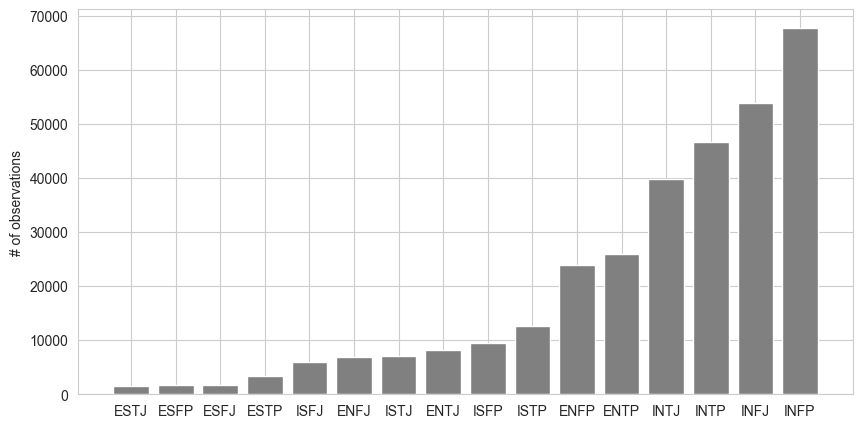

In [84]:
heights = [len(y[y == label]) for label in range(len(type_labels))]
bars = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars = bars.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.show()

This time we have way more than two classes. This makes our resampling a bit complicated, but as before, let's decide on a **class size**. Looking at the bars above, we want to bring the minority classes up as much as possible, but at the same time, we don't want to lose too much data from the majority class. 

In [85]:
# Let's pick a class size of roughly half the size of the largest size
class_size = 30000

Next, we have to upsample anything that has samples fewer than the the class size and downsample anything with samples more than the class size. 

In [86]:
# Before resampling, let's stitch our features and labels together
data = np.concatenate([X, y[:,np.newaxis]], axis=1)

In [87]:
bar_label_df = bars.set_index('labels')

In [88]:
resampled_classes = []

# For each label
for label in range(len(type_labels)):
    # Get num. of observations from this class
    label_size = bar_label_df.loc[label]['heights']
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [89]:
resampled_data = np.concatenate(resampled_classes, axis=0)

In [90]:
resampled_data.shape

(480000, 21)

Split resampled data into X and y

In [91]:
X_resampled = resampled_data[:,:-1]

In [92]:
y_resampled = resampled_data[:,-1]

Now let's view the after image:

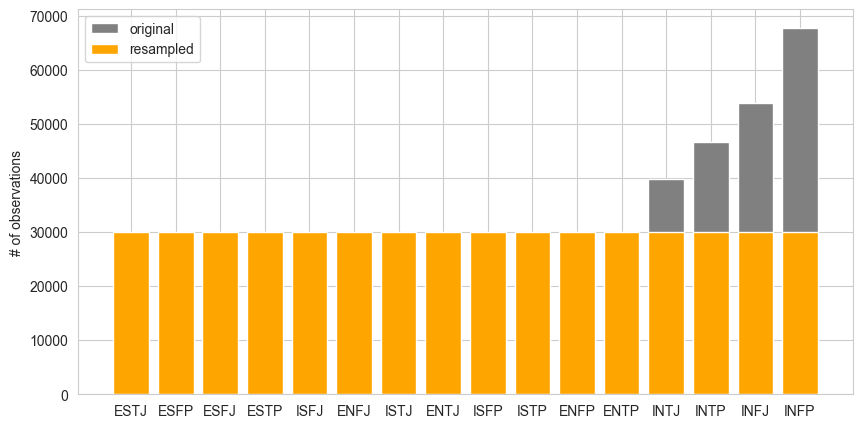

In [93]:
heights = [len(y_resampled[y_resampled == label]) for label in range(len(type_labels))]
bars_resampled = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars_resampled = bars_resampled.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.bar(range(len(bars_resampled)),bars_resampled['heights'],color='orange')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

Now after taking a moment to appreciate what we just did. Let's keep in mind that we don't always have to resample such that all classes end up equal.

**Train test split with balanced data**

In [94]:
# Setting up the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27)

**Training the model**

In [95]:
# Training the logistic regression model on our rebalanced data
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

**Checking outcomes on the testing set**

In [96]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [97]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred_test, target_names=type_labels))

              precision    recall  f1-score   support

        ENFJ       0.09      0.08      0.08      6007
        ENFP       0.09      0.05      0.06      6022
        ENTJ       0.08      0.03      0.04      6056
        ENTP       0.07      0.04      0.05      5953
        ESFJ       0.11      0.15      0.13      6041
        ESFP       0.06      0.03      0.04      6008
        ESTJ       0.08      0.14      0.11      5915
        ESTP       0.08      0.11      0.09      5989
        INFJ       0.08      0.02      0.04      5920
        INFP       0.08      0.01      0.01      6113
        INTJ       0.07      0.34      0.12      6027
        INTP       0.09      0.00      0.00      5961
        ISFJ       0.08      0.07      0.07      6022
        ISFP       0.08      0.13      0.10      5847
        ISTJ       0.08      0.07      0.07      6012
        ISTP       0.09      0.02      0.03      6107

    accuracy                           0.08     96000
   macro avg       0.08   

The resulting model still has poor accuracy. But at least this time, our model is better at predicting more of the classes.

## Where to from here?

Turns out our first model is not very good!  Don't be discouraged as our first attempt usually never is! Generally, there are a couple of methods to try and improve our model:
* Improve the data & feature set
* Try a different model
* Fine tune the algorithm parameters

In your own time, try and use the above suggestions to make this model better.

## Conclusion 

In this train we learned how to deal with class imbalance, and the different resampling techniques that can be applied to imbalanced data. We also applied the use of a logistic regression model on unbalanced and balanced data evaluating the outcome of each. 

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>